# Reading and writing fields

There are three file formats to which a `discretisedfield.Field` object can be saved:

- [VTK](https://vtk.org/) for visualisation using e.g., [ParaView](https://www.paraview.org/) or [Mayavi](https://docs.enthought.com/mayavi/mayavi/)
- OOMMF [Vector Field File Format (OVF)](https://math.nist.gov/oommf/doc/userguide12a5/userguide/Vector_Field_File_Format_OV.html) for exchanging fields with micromagnetic simulators.
- HDF5

Let us say we have a nanosphere sample:

$$x^2 + y^2 + z^2 <= r^2$$

with $r=5\,\text{nm}$. The space is discretised into cells with dimensions $(0.5\,\text{nm}, 0.5\,\text{nm}, 0.5\,\text{nm})$. The value of the field at $(x, y, z)$ point is $(-cy, cx, cz)$, with $c=10^{9}$. The norm of the field inside the cylinder is $10^{6}$.

Let us first build that field.

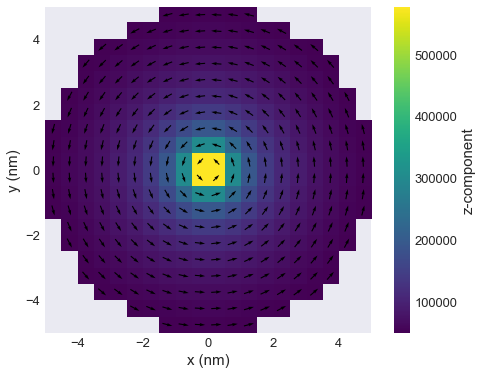

In [1]:
import discretisedfield as df

r = 5e-9
cell = (0.5e-9, 0.5e-9, 0.5e-9)

mesh =  df.Mesh(p1=(-r, -r, -r), p2=(r, r, r), cell=cell)

def norm_fun(pos):
    x, y, z = pos
    if x**2 + y**2 + z**2 <= r**2:
        return 1e6
    else:
        return 0
    
def value_fun(pos):
    x, y, z = pos
    c = 1e9
    return (-c*y, c*x, c*z)

field = df.Field(mesh, dim=3, value=value_fun, norm=norm_fun)
field.plane('z').mpl()

## Writing the field to a file

The main method used for saving field in different files is `discretisedfield.Field.write()`. It takes `filename` as an argument, which is a string with one of the following extensions:
- `'.vtk'` for saving in the VTK format
- `'.ovf'`, `'.omf'`, `'.ohf'` for saving in the OVF format
- `'.h5'` or `'.hdf5'` for saving and HDF5 file

Let us firstly save the field in the VTK file.

In [2]:
vtkfilename = 'my_vtk_file.vtk'
field.write(vtkfilename)

We can check if the file was saved in the current directory.

In [3]:
import os

os.path.isfile(f'./{vtkfilename}')

True

Now, we can delete the file:

In [4]:
os.remove(f'./{vtkfilename}')

Next, we can save the field in the OVF format and check whether it was created in the current directory.

In [5]:
omffilename = 'my_omf_file.omf'
field.write(omffilename)
os.path.isfile(f'./{omffilename}')

True

There are three different possible representations of an OVF file: one ASCII (`txt`) and two binary (`bin4` or `bin8`). Binary `bin8` representation is a default representation when `discretisedfield.Field.write()` is called. If a different representation is required, it can be passed via `representation` argument.

In [6]:
field.write(omffilename, representation='bin4')
os.path.isfile(f'./{omffilename}')

True

In the same way, we can save the HDF5 file:

In [7]:
hdf5filename = 'my_omf_file.hdf5'
field.write(hdf5filename)
os.path.isfile(f'./{hdf5filename}')

True

In [8]:
os.remove(f'./{hdf5filename}')

## Reading files

The method for reading OVF files is a class method `discretisedfield.Field.fromfile()`. By passing a `filename` argument, it reads the file and creates a `discretisedfield.Field` object. It is not required to pass the representation of the OVF file to the `discretisedfield.Field.fromfile()` method, because it can retrieve it from the content of the file.

In [9]:
read_field = df.Field.fromfile(omffilename)

Like previouly, we can quickly visualise the field

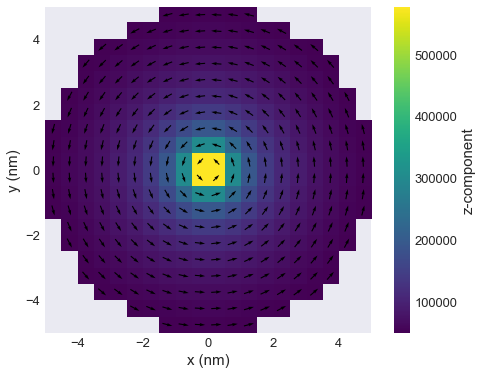

In [10]:
read_field.plane('z').mpl()

Finally, we can delete the OVF file we created.

In [11]:
os.remove(f'./{omffilename}')